In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [47]:
data_train = pd.read_csv('train.csv')
data_train = data_train.drop(['Loan_ID'], axis = 1)
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [49]:
data_test = pd.read_csv('test.csv')
data_test.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [50]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [51]:
# (TRAIN SET) Filling missing rows with most appropriate value (median or mode)
data_train['Gender'].fillna(data_train['Gender'].mode()[0], inplace=True)
data_train['Married'].fillna(data_train['Married'].mode()[0], inplace=True)
data_train['Dependents'].fillna(data_train['Dependents'].mode()[0], inplace=True)
data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0], inplace=True)
data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(), inplace=True)
data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0], inplace=True)
data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0], inplace=True)

In [52]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


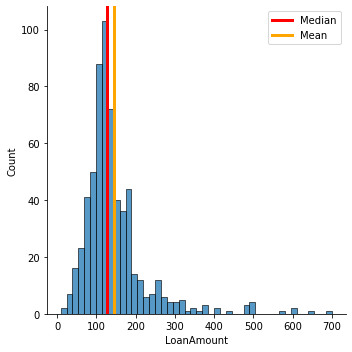

In [53]:
# Example of numerical value histogram why we choose the median instead of the mean
sns.displot(data_train['LoanAmount'])
plt.axvline(x=data_train['LoanAmount'].median(),
            color='red',linewidth=3, label='Median')
plt.axvline(x=data_train['LoanAmount'].mean(),
            color='orange',linewidth=3, label='Mean')
plt.legend()

In [54]:
# (TRAIN SET) Filling missing rows with most appropriate value (median or mode)
data_test['Gender'].fillna(data_test['Gender'].mode()[0], inplace=True)
data_test['Dependents'].fillna(data_test['Dependents'].mode()[0], inplace=True)
data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0], inplace=True)
data_test['LoanAmount'].fillna(data_test['LoanAmount'].median(), inplace=True)
data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].mode()[0], inplace=True)
data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0], inplace=True)

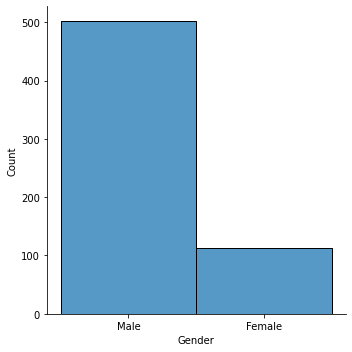

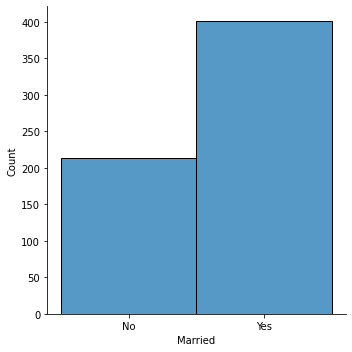

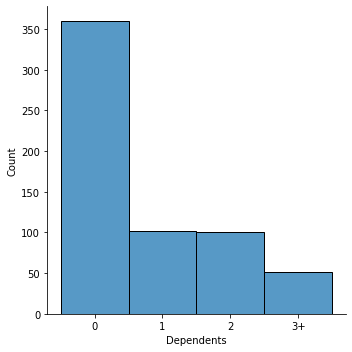

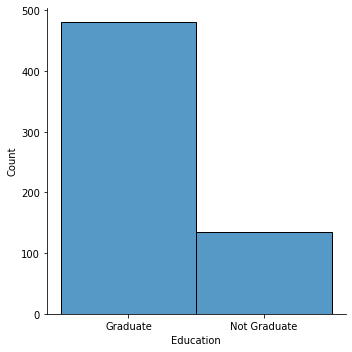

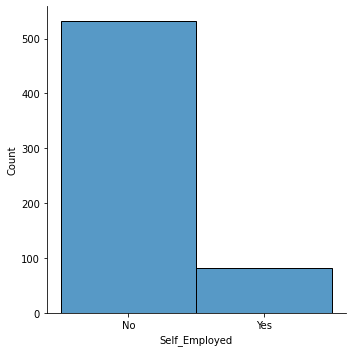

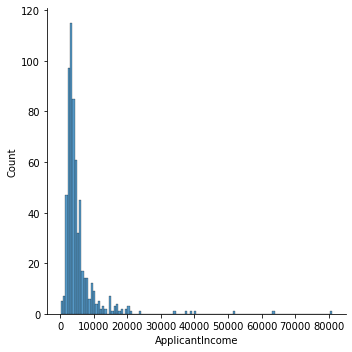

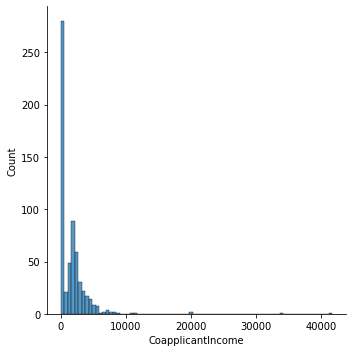

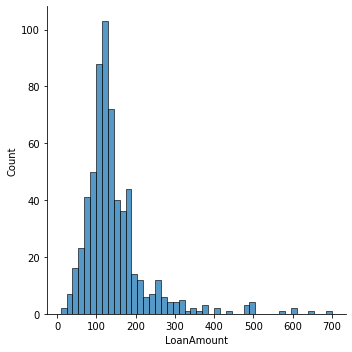

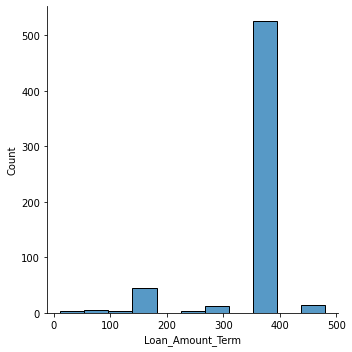

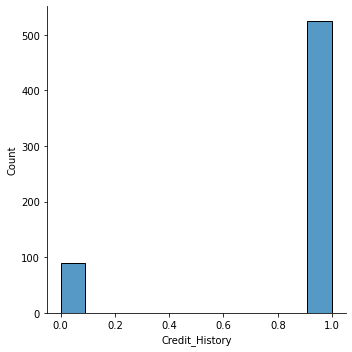

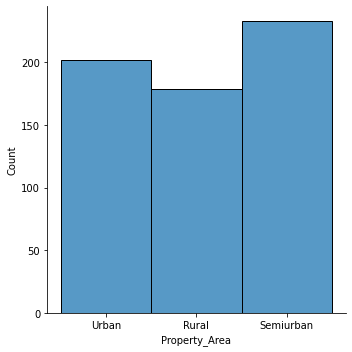

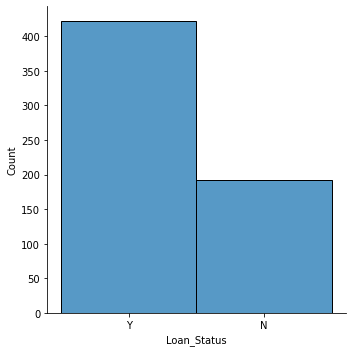

In [55]:
for _ ,column in enumerate(data_train.columns):
    sns.displot(data_train[column])

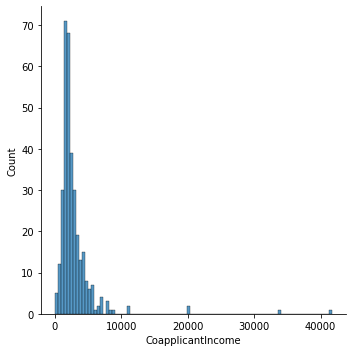

In [56]:
# CoapplicantIncome contains a lot of 0 values (Should we remove this feature from the model?)
sns.displot(data_train[data_train['CoapplicantIncome']>0]['CoapplicantIncome'])

In [57]:
# We believe removing this data may lead to better results since the number of 0s is strange
data_train = data_train.drop(['CoapplicantIncome'], axis=1)

In [58]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


In [16]:
# ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
# 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
# 'Property_Area']

In [59]:
from sklearn.preprocessing import OneHotEncoder


In [64]:
one_enc = OneHotEncoder()

dummy_df =one_enc.fit_transform(data_train[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']]).toarray()

In [65]:
dummy_df = pd.DataFrame(dummy_df, columns =one_enc.get_feature_names_out())

In [67]:
data_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [68]:
# dummies = pd.get_dummies(data_train[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']])
data_train = pd.concat([dummy_df, data_train.drop(['Gender','Married','Education','Self_Employed',\
                        'Dependents','Property_Area',], axis=1)], axis=1)

In [69]:
data_train

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5849,128.0,360.0,1.0,Y
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4583,128.0,360.0,1.0,N
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3000,66.0,360.0,1.0,Y
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2583,120.0,360.0,1.0,Y
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6000,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2900,71.0,360.0,1.0,Y
610,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4106,40.0,180.0,1.0,Y
611,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,8072,253.0,360.0,1.0,Y
612,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7583,187.0,360.0,1.0,Y


In [70]:
# We update categorial outcome to numerical (1 for Accepted Loan else 0)
label_encoder = LabelEncoder()
data_train['Loan_Status'] = label_encoder.fit_transform(data_train['Loan_Status'])

In [147]:
label_encoder.classes_

array(['N', 'Y'], dtype=object)

In [71]:
# Converting Loan Status from object to int type
data_train['Loan_Status'] = data_train['Loan_Status'].astype(int)

In [72]:
# Most correlated values are: 1) Credit_History 2) Property_Area_Semiurban 3) Property_Area_Rural
corr_train = data_train.corr()
corr_train['Loan_Status'].sort_values(ascending=False)

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Married_Yes                0.091478
Education_Graduate         0.085884
Dependents_2               0.062384
Gender_Male                0.017987
Self_Employed_No           0.003700
Dependents_0              -0.003044
Self_Employed_Yes         -0.003700
ApplicantIncome           -0.004710
Gender_Female             -0.017987
Loan_Amount_Term          -0.022549
Dependents_3+             -0.026123
LoanAmount                -0.033214
Dependents_1              -0.038740
Property_Area_Urban       -0.043621
Education_Not Graduate    -0.085884
Married_No                -0.091478
Property_Area_Rural       -0.100694
Name: Loan_Status, dtype: float64

In [73]:
data_train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

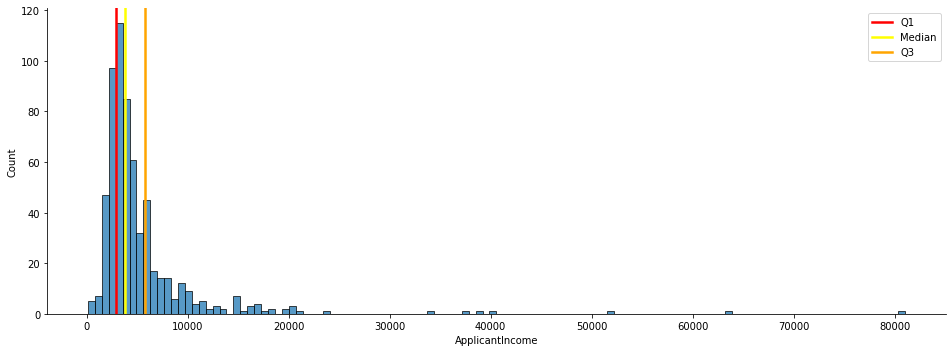

In [74]:
# Representing Quartiles of income.
# We believe this income may have an importance on the prediction because this value is very diversified.
sns.displot(data_train['ApplicantIncome'],aspect=8/3)
plt.axvline(x=np.percentile(data_train['ApplicantIncome'],25),
            color='red',linewidth=2.5, label='Q1')
plt.axvline(x=np.percentile(data_train['ApplicantIncome'],50),
            color='yellow',linewidth=2.5, label='Median')
plt.axvline(x=np.percentile(data_train['ApplicantIncome'],75),
            color='orange',linewidth=2.5, label='Q3')
plt.legend()

In [75]:
data_train['income_cat'] = pd.cut(data_train['ApplicantIncome'], \
                                  bins=[149.0,2870.5,3812.5,5795.0,81000.0],labels=[1,2,3,4])

In [76]:
# We stratify the dataset regarding the income category
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
for train_index, test_index in split.split(data_train, data_train['income_cat']):
    strat_train = data_train.loc[train_index]
    strat_train_test = data_train.loc[test_index]
data_train = strat_train
data_train_test = strat_train_test

In [77]:
data_train = data_train.drop(['income_cat'],axis=1)
data_train_test = data_train_test.drop(['income_cat'], axis=1)

In [78]:
# Separating features columns from predicted value in training set and training-testing set.
data_train_X, data_train_y, data_train_test_X, data_train_test_y = \
data_train.drop(['Loan_Status'],axis=1), data_train['Loan_Status'], data_train_test.drop(['Loan_Status'],axis=1),\
data_train_test['Loan_Status']

In [79]:
data_train_X

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
545,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2768,155.0,360.0,1.0
424,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,14880,96.0,360.0,1.0
213,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5703,130.0,360.0,1.0
162,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3089,121.0,360.0,0.0
256,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6045,115.0,360.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1958,131.0,360.0,1.0
135,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4000,290.0,360.0,1.0
237,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3463,122.0,360.0,1.0
84,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3988,50.0,240.0,1.0


In [80]:
# We have to normalize data_train_X & data_train_test_X
scaler = StandardScaler()
data_train_X, data_train_test_X = scaler.fit_transform(data_train_X),\
scaler.fit_transform(data_train_test_X)

In [81]:
log_reg = LogisticRegression()
log_reg.fit(data_train_X, data_train_y)

LogisticRegression()

In [82]:
# We try using a bagging classifier
bag_log_clf = BaggingClassifier(\
                               log_reg, n_estimators=500,
                               max_samples=100,bootstrap=True,n_jobs=-1,
                               oob_score=True)
bag_log_clf.fit(data_train_X, data_train_y)

BaggingClassifier(base_estimator=LogisticRegression(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [83]:
y_train_predict = cross_val_predict(bag_log_clf, data_train_X, data_train_y, cv= 3)
'Log Classifier Bag - Train score: {}'.format(f1_score(y_train_predict, data_train_y))

'Log Classifier Bag - Train score: 0.8620155038759689'

In [84]:
y_train_test_predict = bag_log_clf.predict(data_train_test_X)
'Log Classifier Bag - Test score: {}'.format(f1_score(y_train_test_predict, data_train_test_y))

'Log Classifier Bag - Test score: 0.8888888888888888'

In [85]:
# This function shows the evolution of the training and testing performance
def show_evo_train_test(model, data_train_X, data_train_y, data_test_X, data_test_y):
    train_errors, test_errors = [], []
    label_encoder = LabelEncoder()
    for i in range(5,len(data_train_X)):
        if data_train_y[:i].nunique() > 1:
            
            model.fit(data_train_X[:i], data_train_y[:i])
            y_train_pred = model.predict(data_train_X[:i])
            y_test_pred = model.predict(data_test_X)
            train_errors.append(f1_score(y_train_pred, data_train_y[:i]))
            test_errors.append(f1_score(y_test_pred, data_test_y))
            #if abs(train_errors[-1]-test_errors[-1]) < 0.005:
            #    print(i)
    plt.plot(np.sqrt(train_errors),'r-', linewidth=2,label='train')
    plt.plot(np.sqrt(test_errors),'b-', linewidth=2,label='test')
    plt.legend()

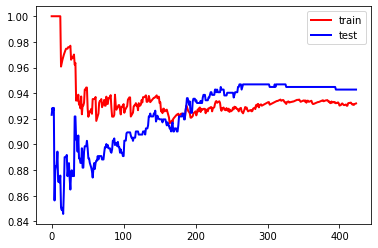

In [86]:
show_evo_train_test(log_reg, data_train_X, data_train_y, data_train_test_X, data_train_test_y)

In [87]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(data_train_X, data_train_y)

DecisionTreeClassifier(max_depth=3)

In [88]:
# We try using a bagging classifier
bag_dt_clf = BaggingClassifier(\
                               dt_clf, n_estimators=500,
                               max_samples=100,bootstrap=True,n_jobs=-1,
                               oob_score=True)
bag_dt_clf.fit(data_train_X, data_train_y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True)

In [89]:
y_train_predict2 = cross_val_predict(bag_dt_clf, data_train_X, data_train_y, cv= 3)
'Decision Tree Bag - Train score: {}'.format(f1_score(y_train_predict2, data_train_y))

'Decision Tree Bag - Train score: 0.867175572519084'

In [90]:
y_train_test_predict2 = bag_dt_clf.predict(data_train_test_X)
'Decision Tree Bag - Test score: {}'.format(f1_score(y_train_test_predict2, data_train_test_y))

'Decision Tree Bag - Test score: 0.896551724137931'

In [91]:
#show_evo_train_test(dt_clf, data_train_X, data_train_y, data_train_test_X, data_train_test_y)

In [92]:
# SVC MODEL
svc_clf = SVC()
svc_clf.fit(data_train_X, data_train_y)

SVC()

In [93]:
# We try using a bagging classifier
bag_svc_clf = BaggingClassifier(\
                               svc_clf, n_estimators=500,
                               max_samples=100,bootstrap=True,n_jobs=-1,
                               oob_score=True)
bag_svc_clf.fit(data_train_X, data_train_y)

BaggingClassifier(base_estimator=SVC(), max_samples=100, n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [94]:
y_train_predict3 = cross_val_predict(bag_svc_clf, data_train_X, data_train_y, cv= 3)
'SVC Bag Classifier - Train score: {}'.format(f1_score(y_train_predict3, data_train_y))

'SVC Bag Classifier - Train score: 0.8588770864946889'

In [95]:
y_train_test_predict3 = bag_svc_clf.predict(data_train_test_X)
'SVC Bag Classifier - Test score: {}'.format(f1_score(y_train_test_predict3, data_train_test_y))

'SVC Bag Classifier - Test score: 0.89419795221843'

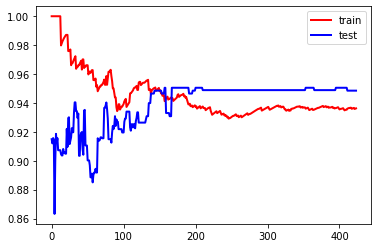

In [96]:
show_evo_train_test(svc_clf, data_train_X, data_train_y, data_train_test_X, data_train_test_y)

In [97]:
# save the models and scaler
pd.to_pickle(bag_log_clf, "LOG.pkl")
pd.to_pickle(scaler, "Scaler.pkl")

In [98]:
# encoder
pd.to_pickle(one_enc, "ENCODER.pkl")

In [105]:
new_test = data_test[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area']]

In [106]:
new_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,158.0,360.0,1.0,Rural


In [7]:
# sample inputs

sample_input = {"Gender": "Male",
 "Married": "Yes",
 "Dependents": "1",
 "Education": "Graduate",
 "Self_Employed": "No",
 "ApplicantIncome": 3076,
 "LoanAmount": 126.0,
 "Loan_Amount_Term": 360.0,
 "Credit_History": 1.0,
 "Property_Area": "Urban"}

In [8]:
dummy_cols =['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
needed_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area']

In [9]:
new_data = pd.DataFrame(sample_input.values()).T

<IPython.core.display.Javascript object>

In [10]:
new_data.columns = needed_cols
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,1,Graduate,No,3076,126.0,360.0,1.0,Urban


In [11]:
converted =pd.DataFrame(one_enc.transform(new_data[dummy_cols]).toarray(), columns=one_enc.get_feature_names_out())

<IPython.core.display.Javascript object>

NameError: name 'one_enc' is not defined

In [127]:
final_input = pd.concat([converted, new_data.drop(dummy_cols, axis=1)], axis=1)

In [139]:
scaled_final_input = scaler.transform(final_input)

In [144]:
pr = bag_log_clf.predict_proba(scaled_final_input)[0]
pr.argmax(), pr.max()

(1, 0.7271889085226971)

In [5]:
MODEL = pd.read_pickle("./LOG.pkl")
ENCODER = pd.read_pickle("./ENCODER.pkl")
SCALER = pd.read_pickle("./Scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
def perfom_analysis(sample_input, the_model, the_scaler, the_one_enc):
    new_data = pd.DataFrame(sample_input.values()).T
    new_data.columns = needed_cols
    converted =pd.DataFrame(the_one_enc.transform(new_data[dummy_cols]).toarray(), columns=the_one_enc.get_feature_names_out())
    final_input = pd.concat([converted, new_data.drop(dummy_cols, axis=1)], axis=1)
    scaled_final_input = the_scaler.transform(final_input)
    predicted = the_model.predict_proba(scaled_final_input)[0]
    risky = "low risk" if 1 else "high risk"
    return predicted.argmax(), predicted.max(), risky
    

In [19]:
perfom_analysis(sample_input, MODEL, SCALER, ENCODER)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(1, 0.7271889085226971, 'low risk')

In [136]:
for col in final_input.columns:
    if col not in data_train.columns:
        print(col)

In [137]:
len(data_train.columns), len(final_input.columns)

(20, 19)

In [ ]:

def diagnose(model, inputs, scaler):
#     input_arr = np.array(list(inputs.values())).reshape(1,-1)
    f = pd.DataFrame(list(inputs.values())).T
    f.columns = list(inputs.keys())

    input_arr = scaler.transform(f)
    output = model.predict_proba(input_arr)
    predict_class = output.argmax()
    predict_probs = output.max()
    
#     print(predict_class, predict_probs)
    if predict_class == 0:
#         print("Low chances of suffering cardiovascular Disease   {:.4f}%".format((1-predict_probs)*100))
        return {"score":str(predict_probs), "class":str(predict_class), "Outcome": "Low chances of suffering cardiovascular Disease   {:.4f}%".format((1-predict_probs)*100) } 
        
    else:
#         print("High chances of suffering cardiovascular Disease   {:.4f}%".format(predict_probs))
        return {"score":str(predict_probs), "class":str(predict_class),"Outcome": "High chances of suffering cardiovascular Disease   {:.4f}%".format(predict_probs)}
#     return {"score":predict_probs, "class":predict_class}